<a href="https://colab.research.google.com/github/Anmolduo02/student-score-predictor/blob/main/Score_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

# Loading & Exploring the Data

In [ ]:

df = pd.read_csv('student_habits_performance.csv')

print(df.head())

print(df.info())
print(df.isnull().sum())


  student_id  age  gender  study_hours_per_day  social_media_hours  \
0      S1000   23  Female                  0.0                 1.2   
1      S1001   20  Female                  6.9                 2.8   
2      S1002   21    Male                  1.4                 3.1   
3      S1003   23  Female                  1.0                 3.9   
4      S1004   19  Female                  5.0                 4.4   

   netflix_hours part_time_job  attendance_percentage  sleep_hours  \
0            1.1            No                   85.0          8.0   
1            2.3            No                   97.3          4.6   
2            1.3            No                   94.8          8.0   
3            1.0            No                   71.0          9.2   
4            0.5            No                   90.9          4.9   

  diet_quality  exercise_frequency parental_education_level internet_quality  \
0         Fair                   6                   Master          Average  

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

# Cleaning & Preparing the Data


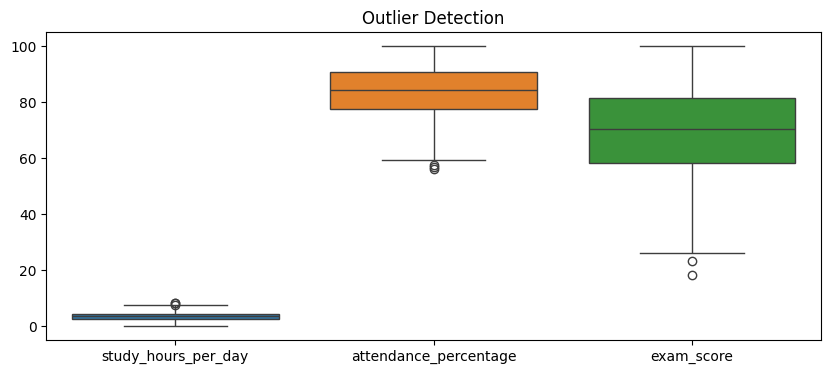

In [ ]:
df = df.dropna()


df = df.drop_duplicates()


plt.figure(figsize=(10,4))
sns.boxplot(data=df[['study_hours_per_day', 'attendance_percentage', 'exam_score']])
plt.title('Outlier Detection')
plt.show()

# EDA & Visualization

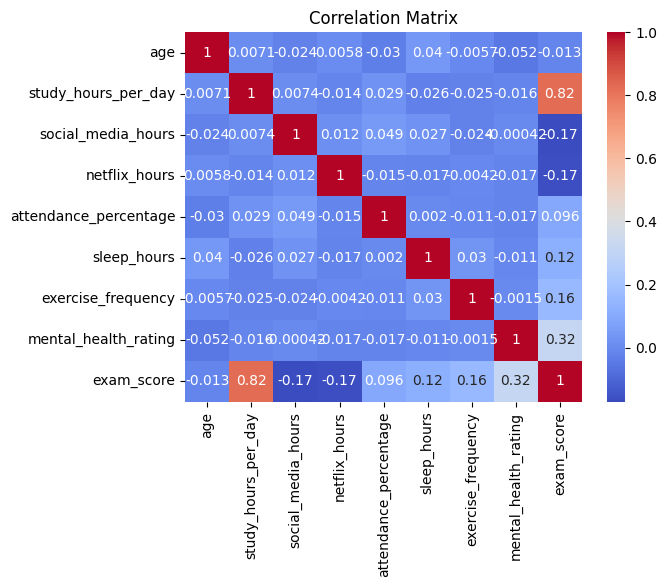

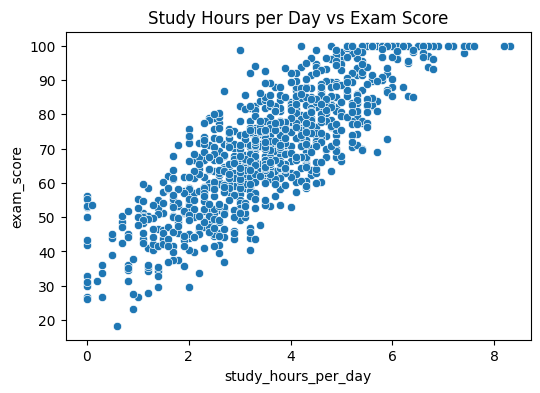

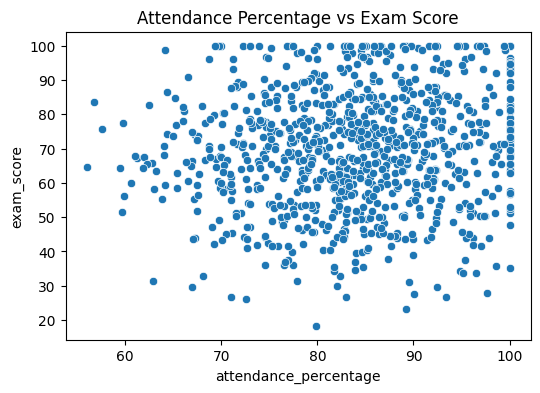

In [ ]:

numeric_df = df.select_dtypes(include=np.number)


sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='study_hours_per_day', y='exam_score')
plt.title('Study Hours per Day vs Exam Score')
plt.show()

plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='attendance_percentage', y='exam_score')
plt.title('Attendance Percentage vs Exam Score')
plt.show()

# Selecting the features and splitting into train-test

In [ ]:

X = df[['study_hours_per_day', 'attendance_percentage']]
y = df['exam_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the model

In [ ]:

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

# Evaluating the model

R² Score: 0.69
Mean Absolute Error: 7.36


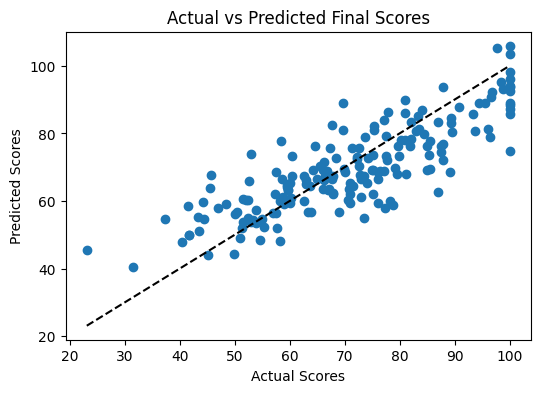

In [ ]:

y_pred = model.predict(X_test)


r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R² Score: {r2:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")


plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores')
plt.title('Actual vs Predicted Final Scores')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.show()


# Prediction Function

In [ ]:
def predict_score(hours_studied, attendance):
    input_df = pd.DataFrame([[hours_studied, attendance]], columns=['study_hours_per_day', 'attendance_percentage'])
    predicted = model.predict(input_df)[0]
    print(f"Predicted Final Score: {predicted:.2f}")
    return predicted

predict_score(4, 80)

Predicted Final Score: 73.04


np.float64(73.04140897922011)

# Saving & Loading the Model

In [ ]:
import joblib

joblib.dump(model, 'score_predictor.pkl')


['score_predictor.pkl']

# Simple Command-line Interface

In [ ]:
if __name__ == "__main__":
    hours = float(input("Enter hours studied: "))
    attendance = float(input("Enter attendance (%): "))
    predict_score(hours, attendance)


Enter hours studied: 18
Enter attendance (%): 100
Predicted Final Score: 206.85
